### Cloning Git Hub repository ---RetinaFace By biubug6

In [ ]:
!pip install torch torchvision facenet-pytorch
!pip install pydantic
!pip install faiss-cpu
!pip install langchain langchain-community langchain-core faiss-cpu
!python -m pip install --upgrade pip
!pip install insightface
# optional (better performance / runtime): pip install onnxruntime-gpu onnxruntime

In [1]:
!git clone https://github.com/biubug6/Pytorch_Retinaface.git

Cloning into 'Pytorch_Retinaface'...


In [58]:
import pandas as pd
from collections import defaultdict
import os,cv2
from tqdm import tqdm

In [66]:
os.chdir("..")
os.getcwd()

'c:\\Users\\thaku\\VS_code\\Face_Detection\\Pytorch_Retinaface'

### Erorr handling and Checking Imports working or Not

In [1]:
import os, sys, shutil, importlib.util

# 1️⃣ Make sure we're in the right repo root
repo_root = r"C:\Users\thaku\VS_code\Face_Detection\Pytorch_Retinaface"
os.chdir(repo_root)
print("✅ Working directory set to:", os.getcwd())

# 2️⃣ Make sure __init__.py exists (create clean one just in case)
init_path = os.path.join("data", "__init__.py")
open(init_path, "w").close()
print("✅ Verified __init__.py exists at:", init_path)

# # 3️⃣ Clear any old import caches
# for folder in ["__pycache__", "data/__pycache__"]:
#     shutil.rmtree(folder, ignore_errors=True)
# print("🧹 Cleared all __pycache__ folders")

# 4️⃣ Force Python to refresh import state
import importlib
importlib.invalidate_caches()

# 5️⃣ Add repo root to sys.path if missing
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)
print("🧠 sys.path includes repo:", repo_root in sys.path)

# 6️⃣ Verify import spec directly
spec = importlib.util.find_spec("data.wider_face")
print("🔍 Module spec found:", spec is not None)

# 7️⃣ Try the import!
if spec is not None:
    from data.wider_face import WiderFaceDetection
    print("✅ SUCCESS: Imported WiderFaceDetection successfully!")
else:
    print("❌ Still not found — restart kernel and re-run this cell first.")


✅ Working directory set to: C:\Users\thaku\VS_code\Face_Detection\Pytorch_Retinaface
✅ Verified __init__.py exists at: data\__init__.py
🧠 sys.path includes repo: True
🔍 Module spec found: True
✅ SUCCESS: Imported WiderFaceDetection successfully!


In [2]:
import os, sys

# 🔧 Change this to your repo root
repo_root = r"C:\Users\thaku\VS_code\Face_Detection\Pytorch_Retinaface"

# Ensure correct working directory
os.chdir(repo_root)

# Add repo root to Python path if not already there
if repo_root not in sys.path:
    sys.path.insert(0, repo_root)

print("✅ Repo root set to:", os.getcwd())
print("✅ data/ folder contents:", os.listdir("data"))


✅ Repo root set to: C:\Users\thaku\VS_code\Face_Detection\Pytorch_Retinaface
✅ data/ folder contents: ['config.py', 'data_augment.py', 'epoch_5', 'FDDB', 'my_faces', 'wider_face.py', '__init__.py', '__pycache__']


In [9]:
import os, sys

# Ensure we are in the repository root
os.chdir(r"c:\Users\thaku\VS_code\Face_Detection\Pytorch_Retinaface")
print("✅ Current directory:", os.getcwd())

# Ensure local 'data' module is importable
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

# Debug check
print("data" in os.listdir(), "wider_face.py" in os.listdir("data"))


✅ Current directory: c:\Users\thaku\VS_code\Face_Detection\Pytorch_Retinaface
True True


### Checking the Setup is Working or Not

In [5]:
import os, sys

# --- 1️⃣ Make sure we're in the repo root ---
os.chdir(r"c:\Users\thaku\VS_code\Face_Detection\Pytorch_Retinaface")
print("Current directory:", os.getcwd())

# --- 2️⃣ Ensure Python can import local modules ---
sys.path.append(os.getcwd())

# --- 3️⃣ Import the RetinaFace dataset class ---
from data.wider_face import WiderFaceDetection

# --- 4️⃣ Load your dataset (check label file name carefully) ---
dataset = WiderFaceDetection("data/my_faces/label.txt")  # or "labels.txt" if that's what you named it

# --- 5️⃣ Print results ---
print("✅ Dataset loaded successfully!")
print("Total images:", len(dataset))

img, ann = dataset[0]
print("Image tensor shape:", img.shape)
print("Annotations shape:", ann.shape)


Current directory: c:\Users\thaku\VS_code\Face_Detection\Pytorch_Retinaface
✅ Dataset loaded successfully!
Total images: 244
Image tensor shape: torch.Size([501, 380, 3])
Annotations shape: (1, 15)


In [6]:
import data; print(data.__file__)


C:\Users\thaku\VS_code\Face_Detection\Pytorch_Retinaface\data\__init__.py


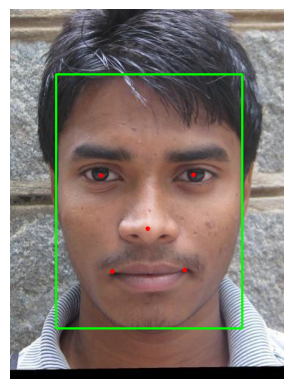

In [7]:
import cv2
import matplotlib.pyplot as plt
import torch

# Fetch image and annotations
img, ann = dataset[9]

# If image is a torch tensor, convert it to numpy
if isinstance(img, torch.Tensor):
    img = img.numpy()

# Convert BGR to RGB for matplotlib
img_rgb = cv2.cvtColor(img.astype('uint8'), cv2.COLOR_BGR2RGB)

# Draw bounding boxes and landmarks
for face in ann:
    x1, y1, x2, y2 = map(int, face[:4])
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Draw 5 landmarks
    for i in range(5):
        lx, ly = int(face[4 + 2 * i]), int(face[5 + 2 * i])
        cv2.circle(img_rgb, (lx, ly), 3, (255, 0, 0), -1)

plt.imshow(img_rgb)
plt.axis("off")
plt.show()


In [8]:
import torch, gc

# Collect Python garbage (unreferenced tensors, dataloaders, etc.)
gc.collect()

# Clear PyTorch GPU cache
torch.cuda.empty_cache()

# Optionally, reset peak memory stats (useful for debugging)
torch.cuda.reset_peak_memory_stats()

print("✅ GPU memory cleared.")

✅ GPU memory cleared.


In [ ]:
!python detect.py 

### Embeddings Generation

In [24]:
!python embeddings.py

✅ VGG-Face embeddings saved to ./embeddings/vggface_embeddings.csv



100%|██████████| 245/245 [00:32<00:00,  7.61it/s]


### Adding Embeddings to database

In [26]:
!python database.py

Loaded embeddings: (245, 512)
✅ Added 245 vectors to FAISS index
✅ Saved FAISS index and face_id metadata


In [27]:
!python langchain_faiss.py

💎 Loading FAISS index and face IDs...
✅ Loaded 245 embeddings and 245 face IDs
💾 LangChain FAISS store with metadata saved to: ./embeddings/langchain_faiss_store


`embedding_function` is expected to be an Embeddings object, support for passing in a function will soon be removed.


## Main Function for Adding Face In DataBase

In [48]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:128"
import torch, gc
gc.collect()
torch.cuda.empty_cache()
!python face_pipeline.py

🔹 Loading pretrained model from ./weights/Resnet50_Final.pth
Removing prefix module.
Loaded 456 matching keys
✅ RetinaFace model initialized and ready.
✅ 1 unique faces detected in test.jpg
💾 Saved aligned face to: ./aligned_faces\1.jpg
✅ Aligned 1 faces, batch shape: torch.Size([1, 3, 160, 160])
✅ Added new face with FaceID: ee270c0e
💾 Saved new face image to: ./face_database\ee270c0e.jpg
💾 LangChain FAISS store updated and saved to ./embeddings/langchain_faiss_store


c:\Users\thaku\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\thaku\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
`embedding_function` is expected to be an Embeddings object, support for passing in a function will soon be removed.


### Function to Check Detection using Retinaface Pipeline 

In [47]:
!python detect.py --network resnet50

Loading pretrained model from ./weights/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456
Finished loading model!
RetinaFace(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=Fals

c:\Users\thaku\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\thaku\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
